In [30]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from argparse import Namespace
import warnings

warnings.filterwarnings('ignore')

In [31]:
def apply_logic_regression(my_dataset_symptoms):

    # dataset_symptoms = pd.get_dummies(dataset_symptoms, columns=[symptoms_select]) # one-hot, only 2 kinds of labels, do not need one-hot
    dataset_symptoms = shuffle(my_dataset_symptoms).reset_index(drop=True) # disrupt the order
    # split training dataset and test dataset
    X = dataset_symptoms.iloc[:, :-1]
    Y = dataset_symptoms.iloc[:, -1:]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

    # normalisation
    X_scaler = StandardScaler().fit(X_train)
    standardized_X_train = X_scaler.transform(X_train)
    standardized_X_test = X_scaler.transform(X_test)

    # Initialising the model and training
    log_reg = linear_model.LogisticRegression(penalty='l2', C=0.000001, solver='liblinear', class_weight = 'balanced',random_state=10)
    log_reg.fit(X_train, y_train)

    # prediction and results
    pred_test = log_reg.predict_proba(standardized_X_test)
    pred_train = log_reg.predict(standardized_X_train)
    pred_test = log_reg.predict(standardized_X_test)

    train_recall = recall_score(y_train, pred_train, average="binary")
    train_f1 = f1_score(y_train, pred_train, average='binary')
    train_acc = accuracy_score(y_train, pred_train)

    test_recall = recall_score(y_test, pred_test,average="binary")
    test_f1 = f1_score(y_test, pred_test, average='binary')
    test_acc = accuracy_score(y_test, pred_test)

    return train_recall, test_recall, train_f1, test_f1, train_acc, test_acc

In [32]:
DATA_DIR_ENTROPY = os.path.join('dataset_all_entropy.csv')
dataset_entropy = pd.read_csv(DATA_DIR_ENTROPY)
dataset_all_events = pd.DataFrame(dataset_entropy, columns=['phase_entropy','dispersion_entropy','approximate_entropy','fuzzy_entropy','label'])
dataset_all_events

,phase_entropy,dispersion_entropy,approximate_entropy,fuzzy_entropy,label
0,0.871765,1.467709,0.492588,0.021454,0
1,0.868714,0.802964,0.152549,0.023901,0
2,0.884751,1.261151,0.229232,0.027334,0
3,0.788908,0.965312,0.196923,0.007077,0
4,0.905744,1.226413,0.195498,0.025497,0
...,...,...,...,...,...
14545,0.839110,1.278987,0.361874,0.027600,1
14546,0.900999,1.150330,0.144654,0.026512,1
14547,0.871264,1.236292,0.288067,0.031721,1
14548,0.902139,1.267327,0.142997,0.021764,1


In [33]:
dataset_all_events.columns

Index(['phase_entropy', 'dispersion_entropy', 'approximate_entropy',
       'fuzzy_entropy', 'label'],
      dtype='object')

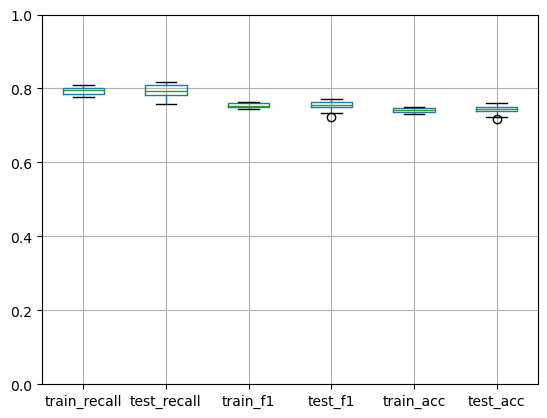

train_recall    0.793991
test_recall     0.793953
train_f1        0.754440
test_f1         0.755199
train_acc       0.741556
test_acc        0.742810
dtype: float64


In [43]:

# model and test, logic regression
train_recall_logic_reg = []
test_recall_logic_reg = []

train_f1_logic_reg = []
test_f1_logic_reg = []

train_acc_logic_reg = []
test_acc_logic_reg = []

for i in range(30):

    # # balance negative and positive lables
    dataset_num = dataset_all_events.label.value_counts().min()
    dataset_symptoms_negative = dataset_all_events[dataset_all_events['label']==0].sample(dataset_num)
    dataset_symptoms_positive = dataset_all_events[dataset_all_events['label']==1].sample(dataset_num)
    dataset_symptoms = pd.concat([dataset_symptoms_negative, dataset_symptoms_positive])
    dataset_symptoms = pd.DataFrame(dataset_symptoms, columns=dataset_all_events.columns)

    train_recall_logic_reg_i, test_recall_logic_reg_i, train_f1_logic_reg_i, test_f1_logic_reg_i, train_acc_logic_reg_i, test_acc_logic_reg_i = apply_logic_regression(dataset_symptoms)
    
    train_recall_logic_reg.append(train_recall_logic_reg_i)
    test_recall_logic_reg.append(test_recall_logic_reg_i)

    train_f1_logic_reg.append(train_f1_logic_reg_i)
    test_f1_logic_reg.append(test_f1_logic_reg_i)

    train_acc_logic_reg.append(train_acc_logic_reg_i)
    test_acc_logic_reg.append(test_acc_logic_reg_i)

train_recall_logic_reg = pd.DataFrame(train_recall_logic_reg, columns=['train_recall'])
test_recall_logic_reg = pd.DataFrame(test_recall_logic_reg, columns=['test_recall'])

train_f1_logic_reg = pd.DataFrame(train_f1_logic_reg, columns=['train_f1'])
test_f1_logic_reg = pd.DataFrame(test_f1_logic_reg, columns = ['test_f1'])

train_acc_logic_reg = pd.DataFrame(train_acc_logic_reg, columns=['train_acc'])
test_acc_logic_reg = pd.DataFrame(test_acc_logic_reg, columns=['test_acc'])


all_events_recall_logic_reg = pd.concat([train_recall_logic_reg, test_recall_logic_reg, train_f1_logic_reg, test_f1_logic_reg, train_acc_logic_reg, test_acc_logic_reg],axis=1)
all_events_recall_logic_reg.to_csv('evaluation_entropy_LR.csv')
all_events_recall_logic_reg.boxplot()  
# all_events_recall_logic_reg.mean()
plt.ylim(0,1) 
plt.show()
print(all_events_recall_logic_reg.mean())